In [1]:
from urllib.request import urlretrieve

url = 'https://raw.githubusercontent.com/tidyverse/tidyr/master/vignettes/billboard.csv'

urlretrieve(url, 'billboard.csv')

('billboard.csv', <http.client.HTTPMessage at 0x1bbe62e5b70>)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import numpy as np
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
import nltk
import glob

%matplotlib inline
sns.set()

df = pd.read_csv('dob_job_application_filings_subset.csv')
pd.set_option('display.max_columns', None)
df.head()

D:\Anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,X,,,,,,,,,,,,DOUGLAS,MASS,PE,0058375,NaN,04/25/2013,04/25/2013,04/25/2013,NaN,NaN,NaN,$75000.00,$986.00,STANDARD,0,0,NaN,NaN,0,0,0,0,0,0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAMES,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,PRE-FILING,04/25/2013,1-2-3 FAMILY,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,BPP,STEVEN,SAVINO,RA,0025259,NaN,04/25/2013,NaN,NaN,NaN,NaN,NaN,$0.00,$1144.00,STANDARD,0,0,NaN,NaN,0,143,0,0,0,0,,,,,NaN,R2,NaN,NaN,NaN,NaN,NaN,NaN,DAVID,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,PERMIT ISSUED - PARTIAL JOB,04/25/2013,OTHER,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,,,,X,GEN. CONSTR.,ASHRAF,ALI,PE,0084178,Y,04/25/2013,04/25/2013,04/25/2013,NaN,04/25/2013,NaN,$30000.00,$522.50,STANDARD,0,0,NaN,NaN,0,0,5,5,54,54,20,20,RES,RES,NOT APPLICABLE,R7-2,NaN,NaN,NaN,NaN,NaN,NaN,JEREMIE,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,STRUCTURAL,J. BUTCH,MACUTAY JR.,PE,0078226,NaN,04/25/2013,04/25/2013,04/25/2013,NaN,NaN,NaN,$1500.00,$225.00,STANDARD,0,0,NaN,NaN,0,0,12,12,120,120,,,E,E,NOT APPLICABLE,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,CARMINE,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,GEN. CONSTR.,JUNHUI,JIA,PE,0086781,NaN,04/25/2013,04/25/2013,04/25/2013,NaN,NaN,NaN,$19500.00,$389.50,STANDARD,0,0,NaN,NaN,0,0,6,6,64,64,,,COM,COM,NaN,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,HYUNG RO,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [10]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [12]:
rename_col = dict()
for col in df.columns:
    if col[-2:] == ' #':
        rename_col[col] = col[:-2]
        
df.rename(rename_col, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job                             12846 non-null int64
Doc                             12846 non-null int64
Borough                         12846 non-null object
House                           12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin                             12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

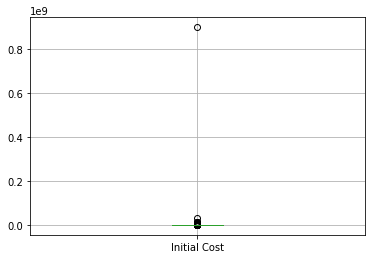

In [13]:
df['Initial Cost'] = df['Initial Cost'].str[1:]
df['Initial Cost'] = pd.to_numeric(df['Initial Cost'], errors='coerce')
df.boxplot(column='Initial Cost')
#df['Initial Cost'].head()

In [14]:
df['Job'].describe()

count    1.284600e+04
mean     2.426788e+08
std      1.312507e+08
min      1.036438e+08
25%      1.216206e+08
50%      2.202645e+08
75%      3.208652e+08
max      5.400246e+08
Name: Job, dtype: float64

In [21]:
df['Borough'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [24]:
df['State'].value_counts(dropna=False)

NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
KS        6
MA        6
VA        5
CO        4
MN        3
SC        3
AZ        3
WI        3
NC        2
RI        2
UT        2
WA        1
NM        1
VT        1
MI        1
IN        1
Name: State, dtype: int64

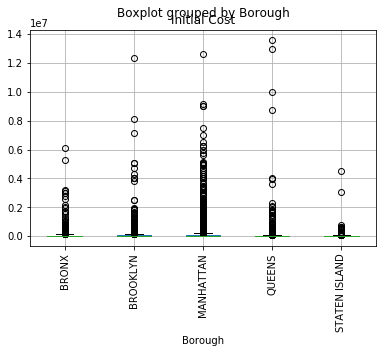

In [7]:
df_subset = df[~(np.abs(df['Initial Cost']-df['Initial Cost'].mean())>(3*df['Initial Cost'].std()))]
df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)

In [19]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12844 entries, 0 to 12845
Data columns (total 82 columns):
Job                             12844 non-null int64
Doc                             12844 non-null int64
Borough                         12844 non-null object
House                           12844 non-null object
Street Name                     12844 non-null object
Block                           12844 non-null int64
Lot                             12844 non-null int64
Bin                             12844 non-null int64
Job Type                        12844 non-null object
Job Status                      12844 non-null object
Job Status Descrp               12844 non-null object
Latest Action Date              12844 non-null object
Building Type                   12844 non-null object
Community - Board               12844 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [14]:
airquality = pd.read_csv('airquality.csv')
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='Measurement', value_name='Reading')
airquality_melt.head()

,Month,Day,Measurement,Reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [15]:
airquality_melt = airquality_melt.pivot_table(index=['Month', 'Day'], values='Reading', columns='Measurement', aggfunc=np.mean)
airquality_melt.reset_index(inplace=True)
airquality_melt.head()

Measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [20]:
tips = pd.read_csv('tips.csv')
tips['sex'] = tips['sex'].astype('category')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
ebola = pd.read_csv('ebola.csv')

In [2]:
g1800s = pd.read_csv('gapminder.csv')
g1800s.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [5]:
g1800s['Life expectancy'].value_counts()

Gambia                      3
Cape Verde                  3
Lebanon                     3
Luxembourg                  3
Libya                       3
Serbia                      3
British Virgin Islands      3
Kenya                       3
Montserrat                  3
Ethiopia                    3
St. Kitts and Nevis         3
Argentina                   3
Marshall Islands            3
Thailand                    3
Mozambique                  3
Honduras                    3
Czechoslovakia              3
Haiti                       3
Croatia                     3
Anguilla                    3
Greenland                   3
New Zealand                 3
Sao Tome and Principe       3
Falkland Is (Malvinas)      3
Bhutan                      3
Syria                       3
Burundi                     3
Russia                      3
Transnistria                3
Somalia                     3
                           ..
American Samoa              3
West Bank and Gaza          3
Northern M

In [84]:
gapminder = pd.read_csv('gapminder.csv')
g1800s = pd.read_csv('gapminder.csv', usecols=[i for i in range(0, 101)], index_col=0)
g1800s['Life expectancy'] = gapminder['Life expectancy']
g1800s.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,Algeria


(20, 55)

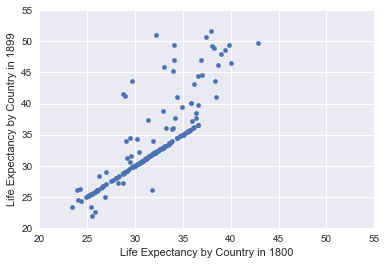

In [16]:
g1800s.plot(kind='scatter', x='1800', y='1899')

plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

In [82]:
countries = g1800s['Life expectancy']
pattern = '^[A-Za-z\.\s]*$'
mask = countries.str.contains(pattern)
c1 = countries[mask]
print(c1[200:])

213                   Sri Lanka
214                       Sudan
215                    Suriname
216                    Svalbard
217                   Swaziland
218                      Sweden
219                 Switzerland
220                       Syria
221                      Taiwan
222                  Tajikistan
223                    Tanzania
224                    Thailand
226                        Togo
227                     Tokelau
228                       Tonga
229                Transnistria
230         Trinidad and Tobago
231                     Tunisia
232                      Turkey
233                Turkmenistan
234    Turks and Caicos Islands
235                      Tuvalu
236                      Uganda
237                     Ukraine
238        United Arab Emirates
239              United Kingdom
240               United States
241                     Uruguay
242                        USSR
243                  Uzbekistan
                 ...           
226     

In [78]:
countries = g1800s['Life expectancy']
pattern = '^[A-Za-z\s]*$'
mask = countries.str.contains(pattern)
c2 = countries[mask]
print(c2)

0                      Abkhazia
1                   Afghanistan
2         Akrotiri and Dhekelia
3                       Albania
4                       Algeria
5                American Samoa
6                       Andorra
7                        Angola
8                      Anguilla
9           Antigua and Barbuda
10                    Argentina
11                      Armenia
12                        Aruba
13                    Australia
14                      Austria
15                   Azerbaijan
16                      Bahamas
17                      Bahrain
18                   Bangladesh
19                     Barbados
20                      Belarus
21                      Belgium
22                       Belize
23                        Benin
24                      Bermuda
25                       Bhutan
26                      Bolivia
27       Bosnia and Herzegovina
28                     Botswana
29                       Brazil
                 ...           
226     

In [67]:
for c in c1:
    if c not in c2:
        print(c)

Abkhazia
Afghanistan
Akrotiri and Dhekelia
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Christmas Island
Cocos Island
Colombia
Comoros
Cook Is
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Czechoslovakia
Denmark
Djibouti
Dominica
Dominican Republic
East Germany
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Eritrea and Ethiopia
Estonia
Ethiopia
Faeroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Isle of Ma

In [68]:
gapminder.groupby('year')

In [89]:
uber = pd.read_csv('nyc_uber_2014.csv', index_col=0, nrows=50)
uber.index.value_counts()[0]

1

In [2]:
?pd.set_option

Signature:   pd.set_option(*args, **kwds)
Type:        CallableDynamicDoc
String form: <pandas.core.config.CallableDynamicDoc object at 0x000002C6E3907278>
File:        d:\anaconda\envs\py36\lib\site-packages\pandas\core\config.py
Docstring:  
set_option(pat, value)

Sets the value of the specified option.

Available options:

- compute.[use_bottleneck, use_numexpr]
- display.[chop_threshold, colheader_justify, column_space, date_dayfirst,
  date_yearfirst, encoding, expand_frame_repr, float_format, height]
- display.html.[border, table_schema]
- display.[large_repr]
- display.latex.[escape, longtable, multicolumn, multicolumn_format, multirow,
  repr]
- display.[line_width, max_categories, max_columns, max_colwidth,
  max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
  multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
  show_dimensions]
- display.unicode.[ambiguous_as_wide, east_asian_width]
- display.[width]
- html.[border]
- io.excel.xls.[writer]
